In [1]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from PIL import Image
from tensorflow.keras.preprocessing import image

In [2]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

DATADIR = "./shapes/Training"                                             # Path of training data after unzipping
CATEGORIES = ["circles","squares","triangles"]  # Storing all the categories in categories variable
IMG_SIZE=28                                                                   # Defining the size of the image to 150    
                     

In [3]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []                                                             # Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR,category)                                  # Joining images with labels
        class_num = category                                                   
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # Converting image to greyscale to reduce the complexity and computation 
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images 
          training_data.append([new_array,class_num])                          # Appending both the images and labels
create_training_data()

### **Reading the Testing Dataset**


In [4]:
DATADIR_test = "./shapes/Testing"                                         # Path of testing data after unzipping
CATEGORIES = ["circles","squares","triangles"]  # Storing all the categories in categories variable
IMG_SIZE=28                                                                   # Defining the size of the image to 150

In [5]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []

def create_testing_data():                                                     # Storing all the testing images
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test,category)                             # Joining images with labels     
        class_num = category
        for img in os.listdir(path):                                           
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # Converting image to greyscale to reduce the complexity and computation 
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                # Resizing the images
          testing_data.append([new_array,class_num])                           # Appending both the images and labels

create_testing_data()

**Let's visualize MRI images randomly from each of the four classes.** 




In [6]:
# Creating 4 different lists to store the image names for each category by reading them from their respective directories. 
circles = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}') ]    # Looping over the path of each image from the glioma_tumor directory
squares = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]     # Looping over the path of each image from the meningioma_tumor directory
triangles = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}') ]  # Looping over the path of each image from the no_tumor directory


# Ranodmly selecting 3 images from each category
select_cir = np.random.choice(circles, 3, replace = False)               
select_sq = np.random.choice(squares, 3, replace = False)
select_tr = np.random.choice(triangles, 3, replace = False)

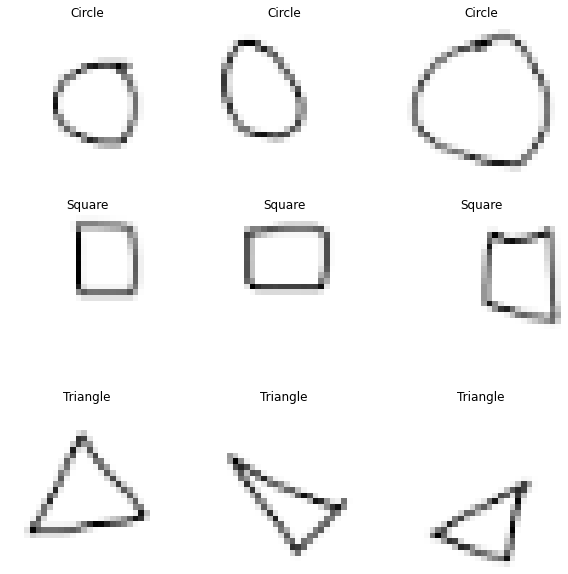

In [7]:

# plotting 4 x 3 image matrix
fig = plt.figure(figsize = (10,10))

# Plotting three images from each of the four categories by looping through their path 
for i in range(9):
    if i < 3:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_cir[i]}'  # Here datadir is a path to the training data and categories[0] indicate the first label galioma tumor and here we are looping over to take the three random images that we have stored in select_galo variable 
        label = 'Circle'                                   
    if i>=3 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_sq[i-3]}'  # Here datadir is a path to the training data and categories[1] indicate the second label meningioma tumor and here we are looping over to take the three random images that we have stored in select_menin variable 
        label = 'Square' 
    if i>=6 and i<9:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_tr[i-6]}'   # Here datadir is a path to the training data and categories[2] indicate the third label no tumor and here we are looping over to take the three random images that we have stored in select_no_t variable 
        label = 'Triangle'
    ax = fig.add_subplot(3, 3, i+1)
    
    # Plotting each image using load_img function
    fn = image.load_img(fp, target_size = (28,28), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

### **Data Preprocessing** 

In [8]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []                                                                   
y_train = []
np.random.shuffle(training_data)          # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in training_data:      # Iterating over the training data which is generated from the create_training_data() function 
    X_train.append(features)              # Appending images into X_train
    y_train.append(label)                 # Appending labels into y_train

In [9]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)          # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features,label in testing_data:      # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)              # Appending images into X_train
    y_test.append(label)                 # Appending labels into y_train

In [10]:
# Converting the list into DataFrame
y_train = pd.DataFrame(y_train, columns=["Label"],dtype=object) 
y_test = pd.DataFrame(y_test, columns=["Label"],dtype=object)

In [11]:
# Converting the pixel values into Numpy array
X_train= np.array(X_train) 
X_test= np.array(X_test) 

In [12]:
## Normalizing the image data 
X_train= X_train/255.0
X_test = X_test/255.0

In [13]:
from sklearn.preprocessing import LabelBinarizer
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer() 
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)

In [14]:
import random
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)


In [15]:
model = Sequential()
model.add(Conv2D(64, 3, activation="relu", padding="same", input_shape=[28,28,1]))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))
optimizer = Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])


2022-03-19 22:28:52.422020: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# classifier.fit(
#     normalized_ds,
#     # steps_per_epoch = int(240/32),
#     epochs = 100,
#     validation_data = normalized_val_ds,
#     # validation_steps = int(60/32),
#     # validation_split=0.2, 
#     batch_size=batch_size, 
#     callbacks=[es], 
#     verbose=1,
#     # class_weight=class_weights
# )

history = model.fit(
    X_train, 
    y_train_e, 
    validation_split=0.1, 
    batch_size=32,
    epochs=30
)

Epoch 1/30
7/7 [==============================] - 1s 61ms/step - loss: 1.2564 - accuracy: 0.2917 - val_loss: 1.1006 - val_accuracy: 0.2917
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 1.0980 - accuracy: 0.3565 - val_loss: 1.1000 - val_accuracy: 0.2917
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 1.0998 - accuracy: 0.3102 - val_loss: 1.0996 - val_accuracy: 0.2917
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 1.0996 - accuracy: 0.3287 - val_loss: 1.0986 - val_accuracy: 0.2917
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 1.0988 - accuracy: 0.3287 - val_loss: 1.0988 - val_accuracy: 0.2917
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 1.0987 - accuracy: 0.3380 - val_loss: 1.0987 - val_accuracy: 0.2917
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 1.0986 - accuracy: 0.3380 - val_loss: 1.0988 - val_accuracy: 0.2917
Epoch 8/30
7/7 [===========

In [18]:
acc=model.evaluate(X_test,np.array(y_test_e))

2/2 [==============================] - 0s 9ms/step - loss: 1.0988 - accuracy: 0.3333
